In [18]:
import pandas as pd
from collections import Counter 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
import gps_poi_analysis

In [19]:
df_map_poicode = pd.read_excel('map_poicode.xlsx')
df_map_poicode.head()

,序号,NEW_TYPE,大类,中类,小类,Big Category,Mid Category,Sub Category
0,1,10000,汽车服务,汽车服务相关,汽车服务相关,Auto Service,Automobile Service Related,Automobile Service Related
1,2,10100,汽车服务,加油站,加油站,Auto Service,Filling Station,Filling Station
2,3,10101,汽车服务,加油站,中国石化,Auto Service,Filling Station,Sinopec
3,4,10102,汽车服务,加油站,中国石油,Auto Service,Filling Station,PetroChina
4,5,10103,汽车服务,加油站,壳牌,Auto Service,Filling Station,Shell


In [20]:
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [21]:
#temp/935026242950791168.csv
#9d844408fcd344b58599e6f58678000a.csv
df = pd.read_csv('temp/4de3be61-9b5b-4c59-bba9-4144f3cbe80e.csv')

In [22]:
df.shape

(574, 17)

In [23]:
df = df.sort_values('Unnamed: 0')

In [24]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [25]:
df.head()

,Unnamed: 0,user_id,car_id,start_time,end_time,start_gps_poi,end_gps_poi,datetime,weekday,city,province,district,township,start_address_name,start_address_type,end_address_name,end_address_type
0,0,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-09 14:27:47,2018-03-09 14:47:47.0,"113.27850000000001,23.195666599999996","113.27566660000002,23.186999999999998",2018-03-09,5,广州市,广东省,白云区,三元里街道,珠江·岭南公馆,"商务住宅,住宅区,住宅小区",白云文化广场试驾基地,"科教文化服务,驾校,驾校"
1,1,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-09 15:31:54,2018-03-09 16:04:05.0,"113.27566660000002,23.187166599999998","113.23349999999999,23.176333299999996",2018-03-09,5,广州市,广东省,白云区,三元里街道,白云文化广场试驾基地,"科教文化服务,驾校,驾校",白云雅苑,"商务住宅,住宅区,住宅小区"
2,2,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 08:12:36,2018-03-10 08:17:17.0,"113.23349999999999,23.176166600000002","113.2343333,23.175833299999994",2018-03-10,6,广州市,广东省,白云区,同德街道,白云雅苑,"商务住宅,住宅区,住宅小区",白云雅苑,"商务住宅,住宅区,住宅小区"
3,3,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 08:23:15,2018-03-10 08:31:34.0,"113.23533329999998,23.1756666","113.23533329999998,23.152",2018-03-10,6,广州市,广东省,白云区,同德街道,溪雨国际广场,购物服务;商场;普通商场,西城同德鞋业基地,"购物服务,服装鞋帽皮具店,服装鞋帽皮具店"
4,4,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 08:50:50,2018-03-10 10:22:52.0,"113.22550000000001,23.137500000000003","112.61483329999999,23.186166600000007",2018-03-10,6,广州市,广东省,荔湾区,桥中街道,广州南北行中药饮片有限公司,公司企业;公司;医药公司,新光傢俬,购物服务;家居建材市场;家具城


In [26]:
df = df.drop(['Unnamed: 0'],axis=1)
df =df.dropna(subset=['end_address_type'])

In [27]:
#获取大类中类和小类  对应0，1，2
def get_class(row,num):
    if ';' in row:
        return row.split(';')[num]
    else:
        return row.split(',')[num]

In [28]:
df['start_address_big_class'] = df['start_address_type'].apply(get_class,args = (0,))
df['start_address_mid_class'] = df['start_address_type'].apply(get_class,args = (1,))
df['start_address_small_class'] = df['start_address_type'].apply(get_class,args = (2,))

In [29]:
df['end_address_big_class'] = df['end_address_type'].apply(get_class,args = (0,))
df['end_address_mid_class'] = df['end_address_type'].apply(get_class,args = (1,))
df['end_address_small_class'] = df['end_address_type'].apply(get_class,args = (2,))

In [30]:
df.head(10)

,user_id,car_id,start_time,end_time,start_gps_poi,end_gps_poi,datetime,weekday,city,province,district,township,start_address_name,start_address_type,end_address_name,end_address_type,start_address_big_class,start_address_mid_class,start_address_small_class,end_address_big_class,end_address_mid_class,end_address_small_class
0,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-09 14:27:47,2018-03-09 14:47:47.0,"113.27850000000001,23.195666599999996","113.27566660000002,23.186999999999998",2018-03-09,5,广州市,广东省,白云区,三元里街道,珠江·岭南公馆,"商务住宅,住宅区,住宅小区",白云文化广场试驾基地,"科教文化服务,驾校,驾校",商务住宅,住宅区,住宅小区,科教文化服务,驾校,驾校
1,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-09 15:31:54,2018-03-09 16:04:05.0,"113.27566660000002,23.187166599999998","113.23349999999999,23.176333299999996",2018-03-09,5,广州市,广东省,白云区,三元里街道,白云文化广场试驾基地,"科教文化服务,驾校,驾校",白云雅苑,"商务住宅,住宅区,住宅小区",科教文化服务,驾校,驾校,商务住宅,住宅区,住宅小区
2,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 08:12:36,2018-03-10 08:17:17.0,"113.23349999999999,23.176166600000002","113.2343333,23.175833299999994",2018-03-10,6,广州市,广东省,白云区,同德街道,白云雅苑,"商务住宅,住宅区,住宅小区",白云雅苑,"商务住宅,住宅区,住宅小区",商务住宅,住宅区,住宅小区,商务住宅,住宅区,住宅小区
3,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 08:23:15,2018-03-10 08:31:34.0,"113.23533329999998,23.1756666","113.23533329999998,23.152",2018-03-10,6,广州市,广东省,白云区,同德街道,溪雨国际广场,购物服务;商场;普通商场,西城同德鞋业基地,"购物服务,服装鞋帽皮具店,服装鞋帽皮具店",购物服务,商场,普通商场,购物服务,服装鞋帽皮具店,服装鞋帽皮具店
4,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 08:50:50,2018-03-10 10:22:52.0,"113.22550000000001,23.137500000000003","112.61483329999999,23.186166600000007",2018-03-10,6,广州市,广东省,荔湾区,桥中街道,广州南北行中药饮片有限公司,公司企业;公司;医药公司,新光傢俬,购物服务;家居建材市场;家具城,公司企业,公司,医药公司,购物服务,家居建材市场,家具城
5,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 10:31:50,2018-03-10 11:02:12.0,"112.6156666,23.1863333","112.62283330000002,23.176000000000002",2018-03-10,6,肇庆市,广东省,鼎湖区,广利街道,广东农信鼎湖农村信用社(广利信用社),金融保险服务;银行;农村商业银行,砚洲村,地名地址信息;普通地名;村庄级地名,金融保险服务,银行,农村商业银行,地名地址信息,普通地名,村庄级地名
6,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 13:27:27,2018-03-10 13:39:22.0,"112.6226666,23.176000000000002","112.6175,23.1756666",2018-03-10,6,肇庆市,广东省,鼎湖区,广利街道,砚洲村,地名地址信息;普通地名;村庄级地名,彼岸寺,风景名胜;风景名胜;寺庙道观,地名地址信息,普通地名,村庄级地名,风景名胜,风景名胜,寺庙道观
7,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 14:09:43,2018-03-10 14:17:44.0,"112.6168333,23.1756666","112.6188333,23.182333299999996",2018-03-10,6,肇庆市,广东省,鼎湖区,广利街道,彼岸寺,风景名胜;风景名胜;寺庙道观,广利渡口,交通设施服务;港口码头;客运港,风景名胜,风景名胜,寺庙道观,交通设施服务,港口码头,客运港
8,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 14:26:43,2018-03-10 14:35:41.0,"112.6193333,23.182500000000005","112.63900000000001,23.177000000000007",2018-03-10,6,肇庆市,广东省,鼎湖区,广利街道,广利渡口,交通设施服务;港口码头;客运港,耕步,地名地址信息;普通地名;村庄级地名,交通设施服务,港口码头,客运港,地名地址信息,普通地名,村庄级地名
9,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,2018-03-10 14:46:35,2018-03-10 14:59:26.0,"112.63900000000001,23.177000000000007","112.6213333,23.176166600000002",2018-03-10,6,肇庆市,广东省,鼎湖区,广利街道,耕步,地名地址信息;普通地名;村庄级地名,砚洲村,地名地址信息;普通地名;村庄级地名,地名地址信息,普通地名,村庄级地名,地名地址信息,普通地名,村庄级地名


In [31]:
a = df[df['end_address_small_class'] =='住宅小区']

In [32]:
df['end_address_name'].value_counts()[:5]

白云雅苑              182
广州市儿童公园            33
万科未来森林(建设中)        29
珠江·岭南公馆            19
广州辉煌仁孚汽车维修有限公司     18
Name: end_address_name, dtype: int64

In [33]:
df['end_address_big_class'].value_counts()[:5]

商务住宅      347
风景名胜       53
地名地址信息     35
购物服务       34
科教文化服务     32
Name: end_address_big_class, dtype: int64

In [34]:
df_weekend = df[df['weekday'].isin([6,7])]
df_workday = df[df['weekday'].isin([i for i in range(1,6)])]

In [35]:
df_weekend.shape

(166, 22)

In [36]:
df_map_poicode.head()

,序号,NEW_TYPE,大类,中类,小类,Big Category,Mid Category,Sub Category
0,1,10000,汽车服务,汽车服务相关,汽车服务相关,Auto Service,Automobile Service Related,Automobile Service Related
1,2,10100,汽车服务,加油站,加油站,Auto Service,Filling Station,Filling Station
2,3,10101,汽车服务,加油站,中国石化,Auto Service,Filling Station,Sinopec
3,4,10102,汽车服务,加油站,中国石油,Auto Service,Filling Station,PetroChina
4,5,10103,汽车服务,加油站,壳牌,Auto Service,Filling Station,Shell


In [37]:
big_exclude = ['地名地址信息','商务住宅']
mid_exclude = ['住宅区','普通地名','交通地名','门牌信息']
small_exclude = []

In [38]:
df_map_poicode[df_map_poicode['大类'] =='商务住宅']   #中类住宅排除‘住宅区’  大类 排除“商务住宅”
big_class_df = df_map_poicode[df_map_poicode['大类'] =='商务住宅']   
small_exclude.extend(list(set(big_class_df[big_class_df['中类']=='住宅区']['小类'])))   #小类排除
small_exclude

['别墅', '住宅小区', '住宅区', '社区中心', '宿舍']

In [39]:
big_class_df = df_map_poicode[df_map_poicode['大类'] =='地名地址信息']
small_exclude.extend(list(set(big_class_df[big_class_df['中类'].isin(['普通地名','交通地名','门牌信息'])]['小类'])))   #小类排除

In [40]:

def get_typecount_of_df(df,classtype):
    '''
    根据classtype 得到所有地址的type标签列表，
    例如输入classtype = 0，则获取所有地址的start_address_big_class,和end_address_big_class列表
    classtype: 0 大类 1 中类 ，2小类
    return list
    '''
    dic_class = {
        0 : 'big_class',
        1 : 'mid_class',
        2 : 'small_class'
    }
    columns_name = dic_class[classtype] 
    
    #初始化地址列表，为第一条数据的起始地址与终止地址
    address_list = []
    address_list.append(df['start_address_'+columns_name].iloc[0])
    address_list.append(df['end_address_'+columns_name].iloc[0])
    
    def get_gps_poi(gps_poi,poi):
        return float(gps_poi.split(',')[poi])
    
    for i in range(1,df.shape[0]):
        #计算终止地址与起始地址的坐标及时间差
        last_x = get_gps_poi(df['end_gps_poi'].iloc[i - 1], 0)
        last_y = get_gps_poi(df['end_gps_poi'].iloc[i - 1], 1)
        # 获取当前开始地址的GPS信息
        now_x = get_gps_poi(df['start_gps_poi'].iloc[i], 0)
        now_y = get_gps_poi(df['start_gps_poi'].iloc[i], 1)

        diff_time = df['start_time'].iloc[i] - pd.to_datetime(df['end_time'].iloc[i - 1])
        hours = int(str(diff_time).split(' ')[2].split(':')[0])
        minues = int(str(diff_time).split(' ')[2].split(':')[1])
        X = [last_y,last_x]
        Y = [now_y,now_x]
        
        #如果距离过短，且停留时间段不长，则去除上一次记录的终止地址，添加当前记录的终止地址
        if gps_poi_analysis.haversine(X,Y)<500 and hours == 0 and minues <= 15:
            address_list.pop()
            address_list.append(df['end_address_'+columns_name].iloc[i])
        else:
            column1 = 'end_address_' + columns_name
            column2 = 'start_address_' + columns_name
            address_list.append(df[column1].iloc[i])
            address_list.append(df[column2].iloc[i])
    return address_list

In [41]:
len(get_typecount_of_df(df_weekend,0))

270

In [42]:
#small_exclude

In [43]:
def get_most_popular_type(df,classtype):
    '''
    获取出现次数最多的类别，按照class_type筛选  不过最后只用到了0！！
    注意：这里筛选时，根据不同类别，都去除了地址类的标签，去除标签见big_exclude，mid_exclude，small_exclude
    注意：需要文件map_poicode.xlsx，为高德官方poi分类信息 
    class_type 0 大类 1 中类 ，2小类
    return dict  （返回的是大类）
    例如：{'汽车服务': 0.5178571428571429,
             '科教文化服务': 0.19642857142857142,
             '餐饮服务': 0.08928571428571429,
             '住宿服务': 0.07142857142857142,
             '购物服务': 0.05357142857142857,
             '其他': 0.07142857142857142}
    '''
    address_list = get_typecount_of_df(df,classtype)
    
    big_exclude = ['地名地址信息','商务住宅']
    mid_exclude = ['住宅区','普通地名','交通地名','门牌信息']
    small_exclude = []
    df_map_poicode = pd.read_excel('map_poicode.xlsx')
    
    big_class_df = df_map_poicode[df_map_poicode['大类'] =='商务住宅']   
    small_exclude.extend(list(set(big_class_df[big_class_df['中类']=='住宅区']['小类'])))   #小类排除
    
    big_class_df = df_map_poicode[df_map_poicode['大类'] =='地名地址信息']
    small_exclude.extend(list(set(big_class_df[big_class_df['中类'].isin(['普通地名','交通地名','门牌信息'])]['小类'])))   #小类排除
    
    
    address_distribute_dic = dict(sorted(dict(Counter(address_list)).items(),key=lambda x:x[-1],reverse=True))
    #筛选大类
    if classtype == 0: 
        for item in big_exclude:
            if item in address_distribute_dic.keys():
                address_distribute_dic.pop(item)

    if classtype == 1: 
        for item in mid_exclude:
            if item in address_distribute_dic.keys():
                address_distribute_dic.pop(item)

    if classtype == 2: 
        for item in small_exclude:
            if item in address_distribute_dic.keys():
                address_distribute_dic.pop(item)

    sums = sum(address_distribute_dic.values())
    # for k,v in dict(Counter(weekend_address_list)).items():
    #     print(k,v)
    i = 0
    keys= []
    values =[]
    value_other = 0
    for k,v in address_distribute_dic.items():
        if i <=4:
            keys.append(k)
            values.append(float(v/sums))
        else:
            value_other +=v 
        i += 1
    keys.append('其他')
    values.append(value_other/sums)
    return dict(zip(keys,values))
    
    

In [44]:
most_type = get_most_popular_type(df_weekend,0)
most_type

{'风景名胜': 0.24468085106382978,
 '购物服务': 0.20212765957446807,
 '科教文化服务': 0.13829787234042554,
 '餐饮服务': 0.11702127659574468,
 '公司企业': 0.0851063829787234,
 '其他': 0.2127659574468085}

In [45]:
def get_type_people(df,most_type):
    #只选取前两个
    count = 0
    dic_type = {}
    print(df.shape)
    for key,v in most_type.items():
        count += 1 
        print(key,v)
        #选取终止地址与开始地址为此类型的
        select = df[(df['end_address_big_class']==key) | (df['start_address_big_class']==key)]
        print(select.shape)
        select = select[select['end_address_big_class']!=select['start_address_big_class']]
        print(select.shape)
        select['address_name'] = ''
        select['big_class']=''
        select['small_class']=''
        select['gps_poi']=''
        #新建4列保存数据，因为分开始地址与终止地址，不好计算
    
        for i in tqdm(range(select.shape[0])):
            select.loc[i,'big_class'] = key
            #select['big_class'].iloc[i] = key
            #若开始地址时此key大类，则保存信息
            if select['start_address_big_class'].iloc[i] == key:
                select['small_class'].iloc[i] =  select['start_address_small_class'].iloc[i]    
                select['address_name'].iloc[i] = select['start_address_name'].iloc[i]
                select['gps_poi'].iloc[i] =select['start_gps_poi'].iloc[i]
            ##若终止地址时此key大类，则保存信息
            else:
               
                select['small_class'].iloc[i] =  select['end_address_small_class'].iloc[i]    
                select['address_name'].iloc[i] = select['end_address_name'].iloc[i]
                select['gps_poi'].iloc[i] =select['end_gps_poi'].iloc[i]
        select.loc[:,'count'] = 1

        #分组计算每个类出现的次数
        temp = select.groupby('small_class').sum().reset_index()
        temp = temp.sort_values('count',ascending=False)
        dic_ = {}
        #筛选记录的总次数
        sum_count = temp['count'].sum()
        dic_[temp['small_class'].iloc[0]] = round(temp['count'].iloc[0]/sum_count,2)
        dic_[temp['small_class'].iloc[1]] = round(temp['count'].iloc[1]/sum_count,2)
        dic_type[key] = dic_
        if count >= 2:
            break
    return dic_type

In [46]:
def get_type_people2(df,most_type):
    #只选取前两个
    count = 0
    dic_type = {}
    print(df.shape)
    for key,v in most_type.items():
        count += 1 
        dic_ = {}
        dic_['prob'] = round(v,2) 
        
        print(key,v)
        #选取终止地址与开始地址为此类型的
        select = df[(df['end_address_big_class']==key) | (df['start_address_big_class']==key)]
        print(select.shape)
        select = select[select['end_address_name']!=select['start_address_name']]
       
        print(select.shape)
        select.loc[:,'address_name'] = ''
        select.loc[:,'big_class']=''
        select.loc[:,'small_class']=''
        select.loc[:,'gps_poi']=''

        for index in tqdm(range(select.shape[0])):
            i = select.index[index]
            select.loc[i,'big_class'] = key
            #select['big_class'].iloc[i] = key
            #若开始地址时此key大类，则保存信息
            if select.loc[i,'start_address_big_class'] == key:

                select.loc[i,'small_class'] =  select['start_address_small_class'].iloc[index]    
                select.loc[i,'address_name'] = select['start_address_name'].iloc[index]
                select.loc[i,'gps_poi'] =select['start_gps_poi'].iloc[index]
            ##若终止地址时此key大类，则保存信息
            else:
                select.loc[i,'small_class'] =  select['end_address_small_class'].iloc[index]    
                select.loc[i,'address_name'] = select['end_address_name'].iloc[index]
                select.loc[i,'gps_poi'] =select['end_gps_poi'].iloc[index]
        select.loc[:,'count'] = 1
        #分组计算每个类出现的次数
        temp = select.groupby('small_class').sum().reset_index()
        temp = temp.sort_values('count',ascending=False)
        
        smallClass = {}
        #筛选记录的总次数
        sum_count = temp['count'].sum()
        smallClass[temp['small_class'].iloc[0]] = round(temp['count'].iloc[0]/sum_count,2)
        smallClass[temp['small_class'].iloc[1]] = round(temp['count'].iloc[1]/sum_count,2)
        
        dic_['smallClass'] = smallClass
        dic_type[key] = dic_
        if count >= 2:
            break
    return dic_type

In [47]:
most_type = get_most_popular_type(df,0)
get_type_people2(df,most_type)

(574, 22)
风景名胜 0.29102167182662536
(104, 22)
(101, 22)


100%|███████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 416.71it/s]


购物服务 0.17956656346749225
(71, 22)
(71, 22)


100%|█████████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<00:00, 466.14it/s]


{'风景名胜': {'prob': 0.29, 'smallClass': {'公园': 0.7, '城市广场': 0.14}},
 '购物服务': {'prob': 0.18, 'smallClass': {'家具城': 0.31, '普通商场': 0.28}}}

In [48]:
most_type = get_most_popular_type(df_workday,0)
get_type_people2(df_workday,most_type)

(408, 22)
风景名胜 0.31004366812227074
(79, 22)
(76, 22)


100%|█████████████████████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 479.56it/s]


科教文化服务 0.19213973799126638
(49, 22)
(48, 22)


100%|█████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 527.42it/s]


{'风景名胜': {'prob': 0.31, 'smallClass': {'公园': 0.72, '风景名胜': 0.13}},
 '科教文化服务': {'prob': 0.19, 'smallClass': {'驾校': 0.4, '中学': 0.27}}}

In [49]:
most_type = get_most_popular_type(df_weekend,0)
get_type_people2(df_weekend,most_type)

(166, 22)
风景名胜 0.24468085106382978
(25, 22)
(25, 22)


100%|█████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 431.30it/s]


购物服务 0.20212765957446807
(23, 22)
(23, 22)


100%|█████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 434.17it/s]


{'风景名胜': {'prob': 0.24, 'smallClass': {'公园': 0.64, '城市广场': 0.24}},
 '购物服务': {'prob': 0.2, 'smallClass': {'家具城': 0.26, '普通商场': 0.22}}}

(43, 22)
汽车服务 0.5714285714285714
(31, 22)
(14, 22)


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  8.20it/s]


科教文化服务 0.22448979591836735
(11, 22)
(9, 22)


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  8.23it/s]


{'汽车服务': {'中国石油': 0.57, '汽车服务相关': 0.36}, '科教文化服务': {'幼儿园': 0.67, '成人教育': 0.22}}

h:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
h:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
h:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

h:\python\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
h:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
h:\python\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
h:\python\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

h:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,user_id,car_id,start_time,end_time,start_gps_poi,end_gps_poi,datetime,weekday,city,province,district,township,start_address_name,start_address_type,end_address_name,end_address_type,start_address_big_class,start_address_mid_class,start_address_small_class,end_address_big_class,end_address_mid_class,end_address_small_class,address_name,big_class,small_class,gps_poi,count
26,908645794054144000,908644331261263872,2018-04-22 13:38:56,2018-04-22 13:41:39.0,"87.68116659999998,43.94800000000001","87.685,43.94516659999999",2018-04-22,7,乌鲁木齐市,新疆维吾尔自治区,米东区,芦草沟乡,中国移动(手机专卖店),购物服务;家电电子卖场;手机销售,蓝天阳光幼儿园,科教文化服务;学校;幼儿园,购物服务,家电电子卖场,手机销售,科教文化服务,学校,幼儿园,蓝天阳光幼儿园,科教文化服务,幼儿园,"87.685,43.94516659999999",1
27,908645794054144000,908644331261263872,2018-04-22 14:35:34,2018-04-22 14:45:44.0,"87.68450000000001,43.94550000000001","87.661,43.95516660000001",2018-04-22,7,乌鲁木齐市,新疆维吾尔自治区,米东区,芦草沟乡,蓝天阳光幼儿园,科教文化服务;学校;幼儿园,路正达驾校,科教文化服务;驾校;驾校,科教文化服务,学校,幼儿园,科教文化服务,驾校,驾校,蓝天阳光幼儿园,科教文化服务,幼儿园,"87.68450000000001,43.94550000000001",1
39,908645794054144000,908644331261263872,2018-04-29 11:43:22,2018-04-29 11:51:32.0,"87.661,43.95516660000001","87.68433329999999,43.94550000000001",2018-04-29,7,乌鲁木齐市,新疆维吾尔自治区,米东区,古牧地东路街道,路正达驾校,科教文化服务;驾校;驾校,蓝天阳光幼儿园,科教文化服务;学校;幼儿园,科教文化服务,驾校,驾校,科教文化服务,学校,幼儿园,路正达驾校,科教文化服务,驾校,"87.661,43.95516660000001",1
40,908645794054144000,908644331261263872,2018-04-29 12:04:09,2018-04-29 13:15:55.0,"87.68433329999999,43.94550000000001","87.53199999999998,44.15316659999999",2018-04-29,7,乌鲁木齐市,新疆维吾尔自治区,米东区,芦草沟乡,蓝天阳光幼儿园,科教文化服务;学校;幼儿园,幸福苑小区(幸福街),"商务住宅,住宅区,住宅小区",科教文化服务,学校,幼儿园,商务住宅,住宅区,住宅小区,蓝天阳光幼儿园,科教文化服务,幼儿园,"87.68433329999999,43.94550000000001",1
42,908645794054144000,908644331261263872,2018-04-29 18:08:46,2018-04-29 19:38:24.0,"87.52966659999998,44.12716660000001","87.68366659999998,43.9461666",2018-04-29,7,NaN,新疆维吾尔自治区,五家渠市,人民路街道,五家渠沁园生态旅游度假村,体育休闲服务;度假疗养场所;度假村,蓝天阳光幼儿园,科教文化服务;学校;幼儿园,体育休闲服务,度假疗养场所,度假村,科教文化服务,学校,幼儿园,蓝天阳光幼儿园,科教文化服务,幼儿园,"87.68366659999998,43.9461666",1
43,908645794054144000,908644331261263872,2018-04-29 21:04:51,2018-04-29 21:12:13.0,"87.68433329999999,43.945833300000004","87.68083330000002,43.94900000000001",2018-04-29,7,乌鲁木齐市,新疆维吾尔自治区,米东区,芦草沟乡,蓝天阳光幼儿园,科教文化服务;学校;幼儿园,中国移动(手机专卖店),购物服务;家电电子卖场;手机销售,科教文化服务,学校,幼儿园,购物服务,家电电子卖场,手机销售,蓝天阳光幼儿园,科教文化服务,幼儿园,"87.68433329999999,43.945833300000004",1
44,908645794054144000,908644331261263872,2018-04-29 21:54:04,2018-04-29 22:01:32.0,"87.68083330000002,43.949333300000006","87.6611666,43.95483329999999",2018-04-29,7,乌鲁木齐市,新疆维吾尔自治区,米东区,芦草沟乡,中国移动(手机专卖店),购物服务;家电电子卖场;手机销售,路正达驾校,科教文化服务;驾校;驾校,购物服务,家电电子卖场,手机销售,科教文化服务,驾校,驾校,路正达驾校,科教文化服务,驾校,"87.6611666,43.95483329999999",1
79,908645794054144000,908644331261263872,2018-05-05 10:23:31,2018-05-05 10:26:56.0,"83.62216660000001,46.518333299999995","83.60966660000003,46.515166599999986",2018-05-05,6,塔城地区,新疆维吾尔自治区,额敏县,额敏镇,宏博宾馆,"住宿服务,宾馆酒店,宾馆酒店",兵团广播电视大学(农九师分校),科教文化服务;学校;成人教育,住宿服务,宾馆酒店,宾馆酒店,科教文化服务,学校,成人教育,兵团广播电视大学(农九师分校),科教文化服务,成人教育,"83.60966660000003,46.515166599999986",1
86,908645794054144000,908644331261263872,2018-05-06 13:43:30,2018-05-06 13:54:48.0,"83.61166659999998,46.492999999999995","83.61016660000001,46.52449999999999",2018-05-06,7,塔城地区,新疆维吾尔自治区,额敏县,额敏镇,中国石油宏达加油站,汽车服务;加油站;中国石油,青苗幼儿园,科教文化服务;学校;幼儿园,汽车服务,加油站,中国石油,科教文化服务,学校,幼儿园,青苗幼儿园,科教文化服务,幼儿园,"83.61016660000001,46.52449999999999",1
87,908645794054144000,908644331261263872,2018-05-06 15:14:55,2018-05-06 15:25:46.0,"83.61033329999998,46.52466659999999","83.61149999999998,46.4928333",2018-05-06,7,塔城地区,新疆维吾尔自治区,额敏县,额敏镇,青苗幼儿园,科教文化服务;学校;幼儿园,中国石油宏达加油站,汽车服务;加油站;中国石油,科教文化服务,学校,幼儿园,汽车服务,加油站,中国石油,青苗幼儿园,科教文化服务,幼儿园,"83.61033329999998,46.52466659999999",1


,small_class,user_id,car_id,weekday,count
0,幼儿园,6360520558379008000,6360510318828847104,49,7
1,成人教育,1817291588108288000,1817288662522527744,13,2
2,驾校,1817291588108288000,1817288662522527744,14,2


{'幼儿园': 0.64, '成人教育': 0.18}

{'汽车服务': {'中国石油': 0.55, '汽车服务相关': 0.39}, '科教文化服务': {'幼儿园': 0.64, '成人教育': 0.18}}

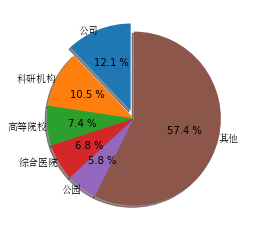

In [521]:
explode = [0.1,0,0,0,0,0]
plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
#autopct ，show percet
p = plt.pie(x=values, labels=keys, explode=explode,autopct='%3.1f %%',
        shadow=True, labeldistance=1.0, startangle = 90,pctdistance = 0.6
 
        )
for front in p[1]:
        front.set_fontproperties(matplotlib.font_manager.FontProperties(
            fname='C:\Windows\Fonts\simsun.ttc'))


In [433]:
df.columns

Index(['user_id', 'car_id', 'start_time', 'end_time', 'start_gps_poi',
       'end_gps_poi', 'datetime', 'weekday', 'city', 'province', 'district',
       'township', 'start_address_name', 'start_address_type',
       'end_address_name', 'end_address_type', 'start_address_big_class',
       'start_address_mid_class', 'start_address_small_class',
       'end_address_big_class', 'end_address_mid_class',
       'end_address_small_class'],
      dtype='object')

In [117]:
df[df['weekday'].isin([i for i in range(1,6)])]['start_address_name'].value_counts()

白云雅苑                 117
万科未来森林(建设中)           32
广州市儿童公园               22
珠江·岭南公馆               13
溪雨国际广场                13
广州辉煌仁孚汽车维修有限公司        11
金鸡岭                   10
白云文化广场试驾基地             9
白云高尔夫花园西区              6
欧亚达建材家居(黄石西路)          6
北站路七号煤研所宿舍             5
公共厕所                   4
天瑞广场                   4
塔脚                     4
白云文化广场(建设中)            4
浔峰阁                    4
麓湖                     3
方兴竹雅苑                  3
万科·双月湾                 3
康怡居(康王北路)              3
康雅花园                   2
皇圣大酒店(同德分店)            2
火炉山森林公园                2
D51科创园                 2
广东电视中心                 2
广州信长贸易有限公司             2
松北工业区                  2
保利·云禧西区                2
白云明珠公寓                 2
星星凯凯国际南区一座             2
国雅五金厂                  2
萧岗练车场                  2
君诚博雅实验学校               2
广州市荔湾区四中聚贤中学           2
穗新创意园                  2
伍福服装城                  2
巽寮旅游区                  2
新宝利大厦                  2
西城同德鞋业基地               2
沃德商务酒店(广州南站长隆店)        2


In [152]:
df[df['weekday'].isin([6,7])]['start_address_name'].value_counts()

白云雅苑                  45
万科未来森林(建设中)           16
广州市儿童公园                6
溪雨国际广场                 5
珠江·岭南公馆                4
皇圣大酒店(同德分店)            4
金鸡岭                    3
白云文化广场(建设中)            3
白云区书法家协会教育基地           2
白云文化广场试驾基地             2
磨溪小区                   2
大围牛岗咀工业区               2
方兴竹雅苑                  2
砚洲村                    2
安华汇                    2
槎龙公安宿舍                 2
一顺农庄                   2
广州站                    1
友谊仓库                   1
欧亚达建材家居(黄石西路)          1
国雅五金厂                  1
岐健村                    1
君诚博雅实验学校               1
天瑞广场                   1
广州市白云区嘉福中学             1
荔湾区府宿舍大院               1
李溪桥                    1
聚龙工业区                  1
家乐居装饰建材城               1
白沙村委会                  1
聚龙五金商务大厦               1
深盈(阳成)机械设备有限公司         1
耕步                     1
南北汽车维修厂                1
南海全民健身体育公园             1
悦顺家苑                   1
国际银行中心                 1
广州市荔湾区四中聚贤中学           1
玫瑰园快捷酒店(黄边地铁站店)        1
白云科技创意园                1


In [118]:
df_all = pd.read_excel('person_info_all.xls')

In [119]:
select_info = df_all[df_all['user_id']==df['user_id'].iloc[0]]

In [120]:
select_info

,Unnamed: 0,user_id,car_id,car_driving_time,car_driving_day,car_driving_time_everyday,start_datetime,end_datetime,day_between_start_end,usage_rate_day,workdaySum_dring,weekendSum_dring,usage_rate_workday,usage_rate_weekend,workdaySum,weekendSum,rate,home_address_gps_by_kde_lng,home_address_gps_by_kde_lat,work_address_gps_by_kde_lng,work_address_gps_by_kde_lat,home_address_weekdend_gps_by_kde_lng,home_address_weekdend_gps_by_kde_lat,work_address_weekdend_gps_by_kde_lng,work_address_weekdend_gps_by_kde_lat,diff_home_lng,diff_home_lat,diff_work_lng,diff_work_lat,provnce,city,district,town,street,home_tag,home_address,work_tag,work_address
254,590,4de3be61-9b5b-4c59-bba9-4144f3cbe80e,971990824101347328,574,171,3.36,2018-03-09,2019-01-04,302.0,0.57,216.0,87.0,0.57,0.55,123.0,48.0,2.56,113.234667,23.175833,113.274333,23.1855,113.2355,23.176667,0.0,0.0,0.000833,0.000833,113.274333,23.1855,广东省,广州市,白云区,NaN,江南一路,NaN,"槎龙果品市场内,新一族渔庄东北351米",NaN,宏宇云璟汇内


In [52]:
import cal_address_type_gaode

In [121]:
city,province,district,township,address_name,address_type = cal_address_type_gaode.get_address_info_by_lat_lng(113.234667,23.175833)
city,province,district,township,address_name,address_type

('广州市', '广东省', '白云区', '同德街道', '白云雅苑', '商务住宅,住宅区,住宅小区')

('衡阳市', '湖南省', '耒阳市', '蔡子池街道', '港湘实验学校', '科教文化服务,学校,中学')

In [122]:
import gps_poi_analysis

In [123]:
gps_lng, gps_lat, select_probability = gps_poi_analysis.get_home_address_gps_by_DBSCAN(df)

In [124]:
gps_lng, gps_lat, select_probability

(113.23333330000003, 23.176333299999996, 1.0)

In [125]:
city,province,district,township,address_name,address_type = cal_address_type_gaode.get_address_info_by_lat_lng(gps_lng,gps_lat)
city,province,district,township,address_name,address_type

('广州市', '广东省', '白云区', '同德街道', '白云雅苑', '商务住宅,住宅区,住宅小区')

In [126]:
gps_lng, gps_lat, select_probability = gps_poi_analysis.get_work_address_gps_by_DBSCAN(df)
gps_lng, gps_lat, select_probability

(0.0, 0.0, 0.0)

In [129]:
gps_lng, gps_lat= gps_poi_analysis.get_work_address_gps_by_KDE(df,0)
gps_lng, gps_lat

(113.27433330000002, 23.185500000000005)

In [131]:
city,province,district,township,address_name,address_type = cal_address_type_gaode.get_address_info_by_lat_lng(gps_lng, gps_lat)
city,province,district,township,address_name,address_type

('广州市', '广东省', '白云区', '三元里街道', '广州市儿童公园', '风景名胜,公园广场,公园')

In [ ]:
df